In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os
import csv
import glob
from sklearn.model_selection import train_test_split
import imblearn

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [5]:
path = "/Users/syam/Desktop/ZotBins/image classification"
class_files = open(path + "/classes_MASTER.txt", 'r')
class_names = class_files.read().splitlines() 
print(class_names)
class_files.close()

['bottle', 'utensils', 'chip_bag', 'soda_can', 'napkin', 'condiment_packets', 'bowl', 'chopsticks', 'subway_bag', 'starbucks_glass_bottle', 'drinking_straw', 'clamshell_containers', 'beverage_cup', 'clear_plastic_container', 'coffee_cup']


In [6]:
all_image_names = list() #contains names of all images
for f in os.listdir(path + "/data_MASTER"):
    if f.endswith(".jpg") or f.endswith(".JPG"):
        all_image_names.append(os.path.join("", f))
print(len(all_image_names)) #number of images in data_master

5108


In [7]:
all_image_desc = list() #contains names of all text files
for f in os.listdir(path + "/data_MASTER"):
    if f.endswith(".txt"):
        all_image_desc.append(os.path.join("", f))
print(len(all_image_desc)) #number of text files in data_master

4243


In [8]:
df = pd.read_csv("labels.csv", usecols = ['image_name','class'])
image_desc = list() 
for i in all_image_desc:
    if i in df.values:
        image_desc.append(i)
print(df) #information in labels.csv
print(len(image_desc)) #number of images with one object in data_master

                image_name  class
0     00a36f96e31731c4.txt      0
1     00b729b5187a1898.txt      0
2     012b0f6b12da485f.txt      1
3     01495549e1f4fd2e.txt      0
4     024fc048dd1cb61a.txt      0
...                    ...    ...
3136    subway_wrap-79.txt      8
3137    subway_wrap-80.txt      8
3138    subway_wrap-81.txt      8
3139    subway_wrap-82.txt      8
3140    subway_wrap-83.txt      8

[3141 rows x 2 columns]
2342


In [9]:
print(len(df[df['class'] == 0])) #number of images with 1 bottle

955


In [10]:
class_values = df['class'].values
class_index = pd.unique(class_values)

In [11]:
df.loc[df['class'] == 6]

,image_name,class
2047,IMG_6622.txt,6
2048,IMG_6623.txt,6
2049,IMG_6624.txt,6
2050,IMG_6625.txt,6
2051,IMG_6626.txt,6
...,...,...
2500,paper_soup_cup_subway (57).txt,6
2501,paper_soup_cup_subway (6).txt,6
2502,paper_soup_cup_subway (7).txt,6
2503,paper_soup_cup_subway (8).txt,6


In [12]:
def deconvert(img_w,img_h,annbox):
        ox = float(annbox[0])
        oy = float(annbox[1])
        ow = float(annbox[2])
        oh = float(annbox[3])
        x = ox*img_w
        y = oy*img_h
        w = ow*img_w
        h = oh*img_h
        xmax = (((2*x)+w)/2)
        xmin = xmax-w
        ymax = (((2*y)+h)/2)
        ymin = ymax-h
        return [int(xmin),int(ymin),int(xmax),int(ymax)]

NameError: name 'tmp' is not defined

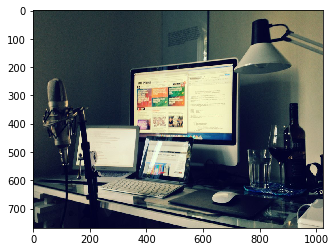

In [13]:
im = np.array(Image.open(path + "/data_MASTER/"+'00a36f96e31731c4.jpg'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)
height = tmp[2]-tmp[0]
width = tmp[3]-tmp[1]
# Create a Rectangle patch
rect = patches.Rectangle((tmp[0],tmp[1]),height,width,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [14]:
img_crop = img.crop((tmp[0],tmp[1],tmp[2],tmp[3]))
img_crop.save(path+'/bottles/'+'00a36f96e31731c4.jpg', quality=95)

NameError: name 'img' is not defined

In [15]:
for i in df.image_name:
    if i in image_desc and df.loc[df['image_name']==i, 'class'].iloc[0] == 6:
        jpg = i[:-3] + 'jpg'
        img = Image.open(path + "/data_MASTER/"+jpg)
        img_w, img_h = img.size
        labelname = i
        labelfilename = os.path.join(path + "/data_MASTER/",labelname)
        if(os.path.exists(labelfilename)):
            with open(labelfilename) as f:
                for (i, line) in enumerate(f):
                    data = line.strip().split()
                    tmp = deconvert(img_w, img_h, data[1:])
            img_crop = img.crop((tmp[0],tmp[1],tmp[2],tmp[3]))
            img_crop = img_crop.convert('RGB')
            img_crop.save(path+'/images/napkin/'+jpg, quality=95)
        else:
            img.save(path+'/images/bowl/'+jpg, quality=95)

In [16]:
def crop_and_save_img(class_names, class_number):
    for i in df.image_name:
        if df.loc[df['image_name']==i, 'class'].iloc[0] == class_number:
            jpg = i[:-3] + 'jpg'
            if(os.path.exists(path + "/data_MASTER/"+jpg)):
                img = Image.open(path + "/data_MASTER/"+jpg)
                img_w, img_h = img.size
                labelname = i
                labelfilename = os.path.join(path + "/data_MASTER/",labelname)
                if(os.path.exists(labelfilename)):
                    with open(labelfilename) as f:
                        for (i, line) in enumerate(f):
                            data = line.strip().split()
                            tmp = deconvert(img_w, img_h, data[1:])
                    img_crop = img.crop((tmp[0],tmp[1],tmp[2],tmp[3]))
                    img_crop = img_crop.convert('RGB')
                    img_crop.save(path+'/images/'+class_names+'/'+jpg, quality=95)
                else:
                    img = img.convert('RGB')
                    img.save(path+'/images/'+class_names+'/'+jpg, quality=95)
            else:
                continue

In [17]:
for i in class_index:
    os.mkdir(path+'/images/'+class_names[i]+'/')
    crop_and_save_img(class_names[i], i)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: '/Users/syam/Desktop/ZotBins/image classification/images/bottle/'

In [18]:
bottle = glob.glob(path+'/images/bottle/*.*')
utensils = glob.glob(path+'/images/utensils/*.*')
chip_bag = glob.glob(path+'/images/chip_bag/*.*')
soda_can = glob.glob(path+'/images/soda_can/*.*')
napkin = glob.glob(path+'/images/napkin/*.*')
condiment_packets = glob.glob(path+'/images/condiment_packets/*.*')
bowl = glob.glob(path+'/images/bowl/*.*')
chopsticks = glob.glob(path+'/images/chopsticks/*.*')
subway_bag = glob.glob(path+'/images/subway_bag/*.*')
starbucks_glass_bottle = glob.glob(path+'/images/starbucks_glass_bottle/*.*')

In [19]:
image_dirs = list()
image_dirs.append(bottle)
image_dirs.append(utensils)
image_dirs.append(chip_bag)
image_dirs.append(soda_can)
image_dirs.append(napkin)
image_dirs.append(condiment_packets)
image_dirs.append(bowl)
image_dirs.append(chopsticks)
image_dirs.append(subway_bag)
image_dirs.append(starbucks_glass_bottle)

In [20]:
img_width, img_height = 100, 100

In [21]:
data = []
labels = []

# for i in bottle:   
#     image=tf.keras.preprocessing.image.load_img(i, 
#     target_size= (img_width, img_height))
#     image=np.array(image)
#     data.append(image)
#     labels.append(0)

for i in image_dirs:
    for j in i:
        image=tf.keras.preprocessing.image.load_img(j, 
        target_size= (img_width, img_height))
        image=np.array(image)
        data.append(image)
        labels.append(image_dirs.index(i))
    
data = np.array(data)
labels = np.array(labels)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)

In [23]:
train_images = X_train/255.0
test_images = X_test/255.0

In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
resampled_training_inputs, resampled_training_outputs_labels = sm.fit_resample(train_images, y_train)

ValueError: Found array with dim 4. Estimator expected <= 2.

In [205]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('softmax'))

In [206]:
model.compile(loss=tf.keras.losses.MeanSquaredLogarithmicError(),
              optimizer='rmsprop',
              metrics=['accuracy'])

In [207]:
# model.fit_generator(
#         train_generator,
#         steps_per_epoch=len(train_generator.filenames),
#         epochs=20,
#         validation_data=test_generator,
#         validation_steps=len(test_generator.filenames),
#         callbacks=[EarlyStopping(patience=3, restore_best_weights=True),ReduceLROnPlateau(patience=2)])
# # fixed error
model.fit(train_images, y_train, epochs=20)

Train on 2493 samples
Epoch 1/20
2493/2493 [==============================] - 9s 4ms/sample - loss: 0.5198 - accuracy: 0.3638
Epoch 2/20
 800/2493 [========>.....................] - ETA: 6s - loss: 0.5146 - accuracy: 0.3490

KeyboardInterrupt: 

In [40]:
model.save_weights(path+"/basic_cnn_20_epochs.h5")

In [41]:
test_loss, test_acc = model.evaluate(test_images, y_test)

469/469 [==============================] - 1s 1ms/sample - loss: 0.6721 - accuracy: 0.8550


In [42]:
predictions = model.predict(test_images)
y_test[0:10]

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

Class: not bottle


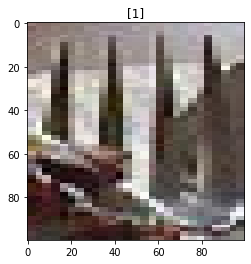

Class: bottle


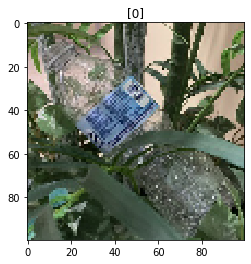

Class: bottle


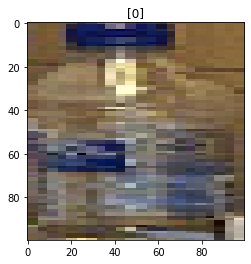

Class: not bottle


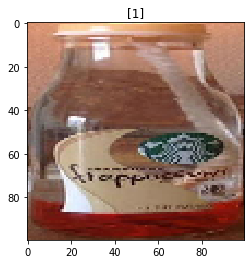

Class: not bottle


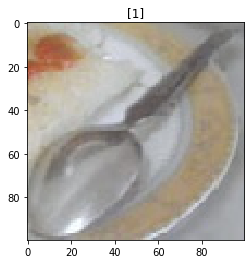

Class: bottle


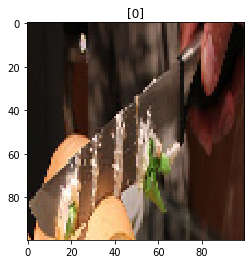

Class: not bottle


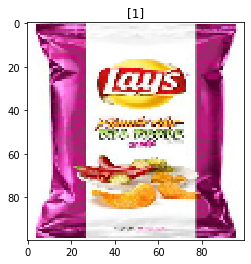

Class: not bottle


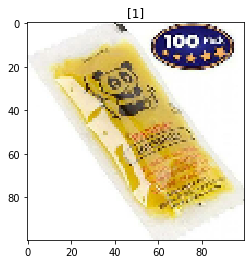

Class: not bottle


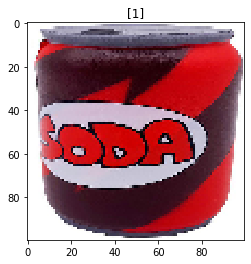

Class: bottle


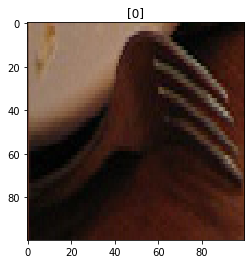

In [81]:
for i in test_images[:10]:
    test_img = (np.expand_dims(i,axis=0))
    img_class = model.predict_classes(test_img)
    classname = img_class[0]
    if classname == 0:
        print("Class: bottle")
    else:
        print("Class: not bottle")
    plt.imshow(i)
    plt.title(classname)
    plt.show()